In [1]:
%cd Experiment-Simulation/

/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/local/adaptive/Experiment-Simulation


In [2]:
root = 'Acetylcholine-Dopamine-concACh-concDA-network/'

In [3]:
from snudda.utils.load import SnuddaLoad 
loadeddata =  SnuddaLoad(root + "network-synapses.hdf5")

posInfo = loadeddata.data

Loading 29 neurons with 21504 synapses and 0 gap junctions


In [4]:
posInfo.keys()

dict_keys(['config', 'nNeurons', 'neuronID', 'nSynapses', 'nGapJunctions', 'synapses', 'gapJunctions', 'synapseCoords', 'configFile', 'positionFile', 'SlurmID', 'simulationOrigo', 'voxelSize', 'axonStumpIDFlag', 'neurons', 'neuronPositions', 'name', 'populationUnit', 'morph', 'connectivityDistributions'])

In [5]:
[k for k in posInfo['neurons'] if 'dSPN' in k['name']]

[{'name': 'dSPN_0',
  'morphology': '/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons/striatum/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20210212/WT-1215MSN03-cor-rep-ax-res3.swc',
  'type': 'dSPN',
  'neuronID': 1,
  'volumeID': 'Striatum',
  'hoc': '',
  'position': array([0.00352479, 0.00461317, 0.00507932]),
  'rotation': array([[ 0.1228988 , -0.80843415,  0.57561282],
         [ 0.88270944,  0.35412792,  0.30889717],
         [-0.45356359,  0.47013578,  0.75713435]]),
  'maxDendRadius': 0.0002086135091832571,
  'maxAxonRadius': 0.000306811103405483,
  'virtualNeuron': False,
  'axonDensityType': None,
  'axonDensity': None,
  'axonDensityBoundsXYZ': None,
  'axonDensityRadius': nan,
  'parameterID': 872213,
  'modulationID': 784100},
 {'name': 'dSPN_2',
  'morphology': '/home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation-software/network_parameters/neurons/striatum/dspn/str-dspn-e150917_c10_D

In [6]:
[k['name'] for k in posInfo['neurons'] if 'dSPN' in k['name']]

['dSPN_0',
 'dSPN_2',
 'dSPN_1',
 'dSPN_0',
 'dSPN_1',
 'dSPN_2',
 'dSPN_1',
 'dSPN_0',
 'dSPN_0',
 'dSPN_1',
 'dSPN_2',
 'dSPN_1',
 'dSPN_2',
 'dSPN_2',
 'dSPN_2',
 'dSPN_0',
 'dSPN_2',
 'dSPN_0',
 'dSPN_1',
 'dSPN_1',
 'dSPN_2',
 'dSPN_2',
 'dSPN_1',
 'dSPN_0',
 'dSPN_0']

In [6]:
[{k : info['Dopamine']['channelModelID']} for k, info in posInfo['connectivityDistributions'].items() if 'DopaminergicAxon' in k ]

[{('DopaminergicAxon', 'dSPN'): 27},
 {('DopaminergicAxon', 'iSPN'): 28},
 {('DopaminergicAxon', 'FSN'): 29},
 {('DopaminergicAxon', 'LTS'): 30},
 {('DopaminergicAxon', 'ChIN'): 31}]

# Line  174 detect.py

        # Columns in hyperVoxelSynapses:
        # 0: sourceCellID, 1: destCellID, 2: voxelX, 3: voxelY, 4: voxelZ,
        # 5: hyperVoxelID, 6: channelModelID,
        # 7: sourceAxonSomaDist (not SI scaled 1e6, micrometers),
        # 8: destDendSomaDist (not SI scaled 1e6, micrometers)
        # 9: destSegID, 10: destSegX (int 0 - 1000, SONATA wants float 0.0-1.0)
        # 11: conductance (int, not SI scaled 1e12, in pS)
        # 12: parameterID
        #
        # Note on parameterID:
        # If there are n parameter sets for the particular synapse type, then
        # the ID to use is parameterID % n, this way we can reuse connectivity
        # if we add more synapse parameter sets later.

        self.hyper_voxel_synapses = None

        # Columns in hyperVoxelGapJunctions
        # 0: sourceCellID, 1: destCellID, 2: sourceSegID, 3: destSegID,
        # 4: sourceSegX, 5: destSegX, 6: voxelX, 7: voxelY, 8: voxelZ,
        # 9: hyperVoxelID, 10: conductance (integer, in pS)

In [7]:
d = [k for k in posInfo['synapses'] if k[6] in [27,28,29,30,31]]

In [8]:
d = [k for k in posInfo['synapses'] if k[6] in [27]]

In [9]:
num_synapses = dict()
for ra in d:
    
    cell = ra[1]
    
    if cell in num_synapses.keys():
        num_synapses[cell]['count'] +=1 
        num_synapses[cell]['section'].append(ra[9])
        num_synapses[cell]['pos'].append(ra[10])
        
        
    else:
        num_synapses.update({cell : {'count' : 1}})
        num_synapses[cell].update({'section' : [ra[9]]})
        num_synapses[cell].update({'pos' : [ra[10]]})

In [10]:
re = dict()
import numpy as np
for kl, infor in num_synapses.items():
    re.update({ kl : len(np.unique(infor['pos']))})

In [11]:
re.keys()

dict_keys([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [12]:
from project_wide.compare_plot_traces import comparePlotTraces
from project_wide.compare_activity_analyse import compareTraces

In [13]:
root = 'Acetylcholine-Dopamine-concACh-concDA-network/'
simroot = root + 'simulation/'
fn = [simroot + 'network-voltage-ACh-DA-network-burst-control.csv',\
      simroot + 'network-voltage-ACh-DA-network-burst.csv']

nf = [root + 'network-synapses.hdf5',\
      root + 'network-synapses.hdf5']


kl = compareTraces(fileNames=fn,\
                      networkFiles=nf,labels=['Control', 'DA'],colours=['black','red'])



Unable to guess ID, using 666.
Loading 27 neurons with 11266 synapses and 0 gap junctions
Loading 27 neurons with 11266 synapses and 0 gap junctions


/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


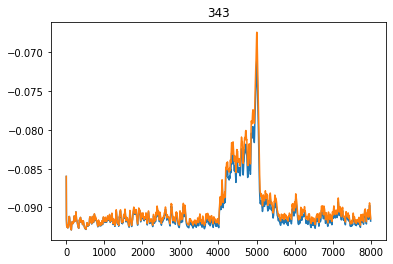

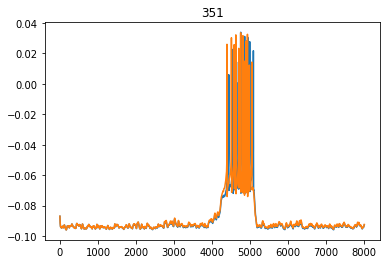

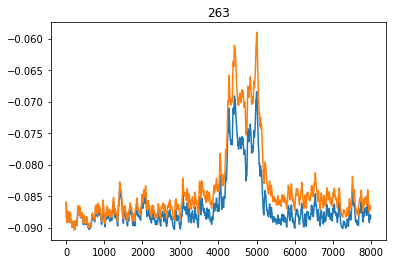

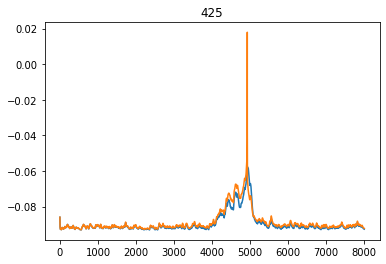

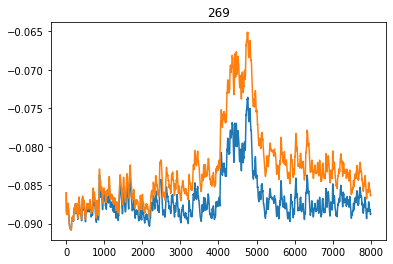

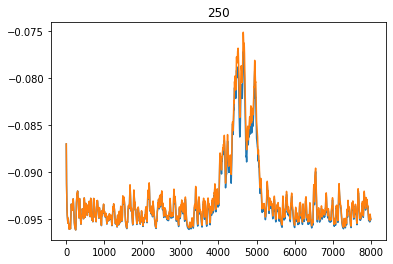

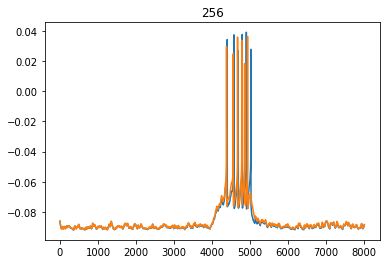

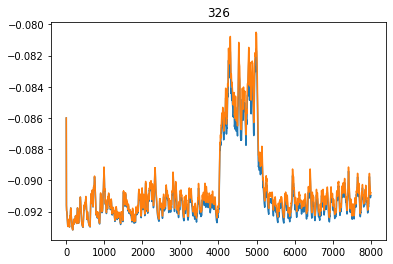

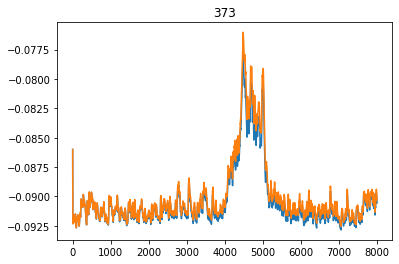

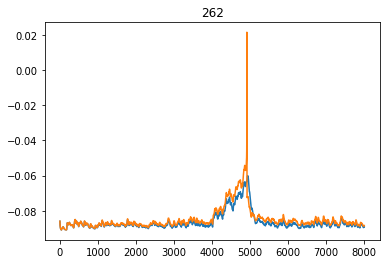

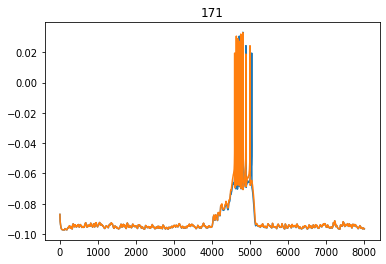

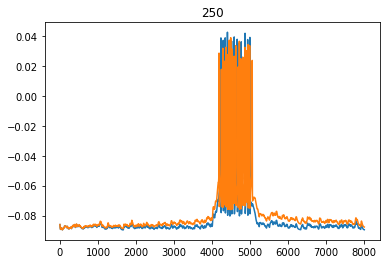

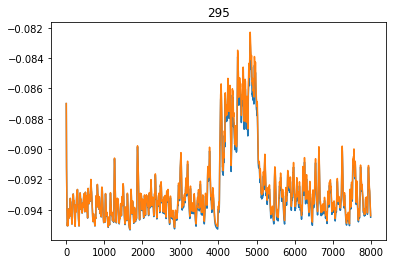

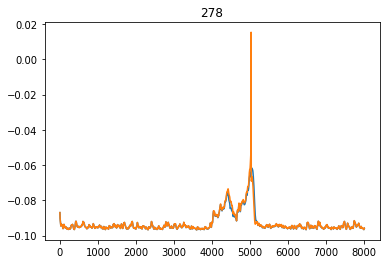

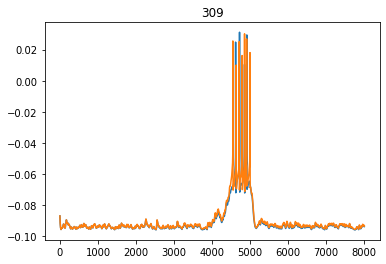

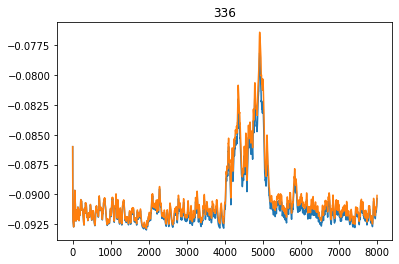

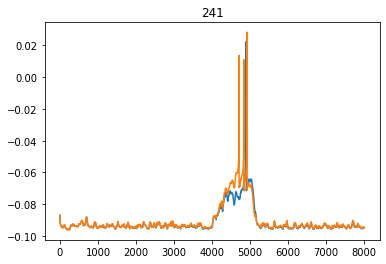

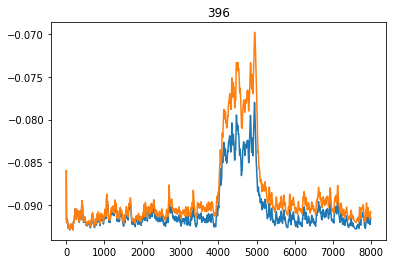

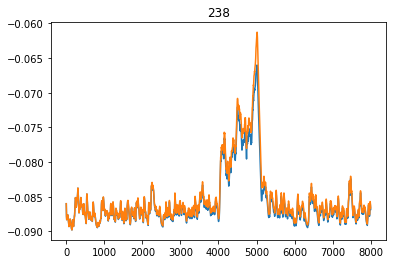

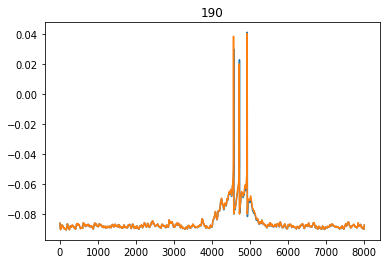

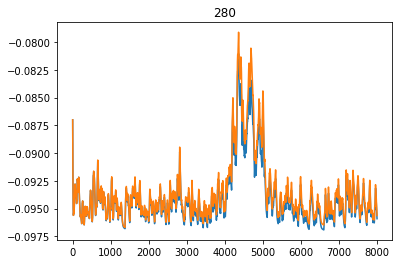

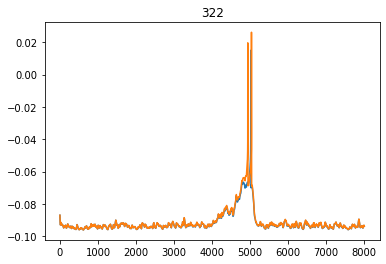

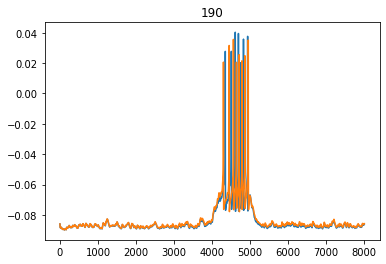

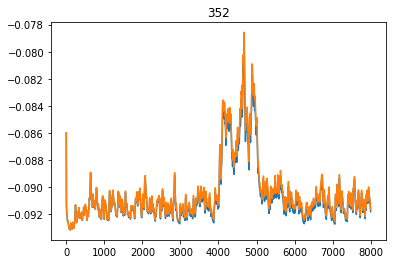

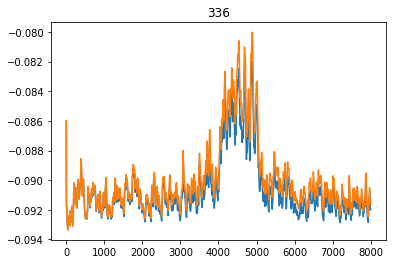

In [18]:
import matplotlib.pyplot as plt

for i, voltages in kl.get_traces(neuronType='dSPN').items():
    
    for k, volt in voltages.items():
        plt.figure(k)
        plt.plot(volt)
        plt.title(re[k])
        
        
plt.show()
        

In [15]:
import json

with open(simroot + 'gpcr-trialpos.json','r') as f:
    dicty = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Acetylcholine-Dopamine-concACh-concDA-network/simulation/gpcr-trialpos.json'

In [ ]:
num_cells = list()

for k, info in dicty.items():
    
    cell = info['cell_seg'][0].split('.')[0]
    
    if cell not in num_cells:
        num_cells.append(cell)
        

In [ ]:
 dicty

In [ ]:
num_cells = dict()

for k, info in dicty.items():
    
    cell = info['cell_seg'][0].split('.')[0]
    
    if cell not in num_cells.keys():
        num_cells.update({cell : 1})
    else:
        num_cells[cell] +=1
        

In [ ]:
num_cells

In [ ]:
num_cells = dict()

for k, info in dicty.items():
    
    cell = info['cell_seg'][0].split('.')[0]
    
    if cell not in num_cells.keys() and 'soma' in info['cell_seg'][0]:
        num_cells.update({cell : 1})
    elif 'soma' in info['cell_seg'][0]:
        num_cells[cell] +=1
        

In [ ]:
import matplotlib.pyplot as plt

for i, voltages in kl.get_traces(neuronType='dSPN').items():
    rk = 0
    for k, volt in voltages.items():
        plt.figure(k)
        plt.plot(volt)
        plt.title(str([*num_cells.values()][rk]) + [*num_cells.keys()][rk])
        rk = rk + 1
        
        
plt.show()